In [13]:
import pandas as pd 

In [90]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Load Data

df=pd.read_csv('Zomato Dataset.csv',parse_dates=[0],header=0)

In [92]:
# Set the "Date" column as the index of the DataFrame (required for time series operations)

df.set_index("Date", inplace=True)

In [93]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...
2024-05-15,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
2024-05-16,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
2024-05-17,195.149994,196.000000,193.100006,194.850006,194.850006,20841351


In [94]:
# Display DataFrame information

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2021-07-23 to 2024-05-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       698 non-null    float64
 1   High       698 non-null    float64
 2   Low        698 non-null    float64
 3   Close      698 non-null    float64
 4   Adj Close  698 non-null    float64
 5   Volume     698 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 38.2 KB


In [95]:
# Read the CSV file and select only the second column (index 1)
# - `usecols=[1]`: Picks only the second column (index starts at 0)
# - `names=['High']`: Renames the selected column to 'High'
# - `header=0`: Uses the first row of the CSV as the header

df1 =pd.read_csv('Zomato Dataset.csv', usecols=[1], names=['High'], header=0)

In [96]:
df1

,High
0,116.000000
1,126.349998
2,141.699997
3,131.000000
4,134.949997
...,...
693,188.800003
694,192.899994
695,195.149994
696,194.399994


In [97]:
# Check the type of the df1 data frame 
type(df1)

pandas.core.frame.DataFrame

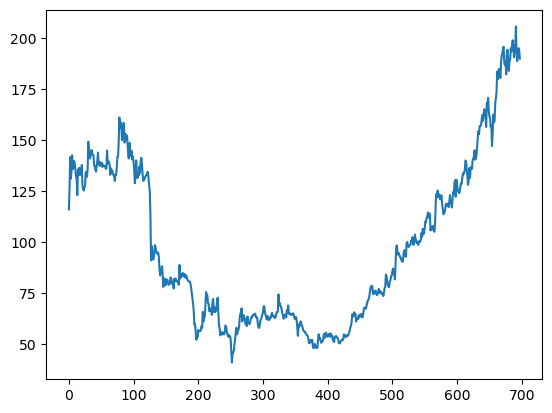

In [98]:
#
plt.plot(df1.index,df1,[])

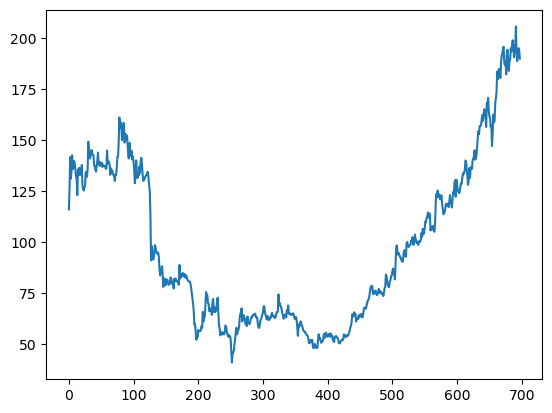

In [99]:
# Plot the "High" values over time

import matplotlib.pyplot as plt# Import the module
import pandas as pd 
plt.plot(df1.index, df1, [])
plt.show()  # Display the plot 


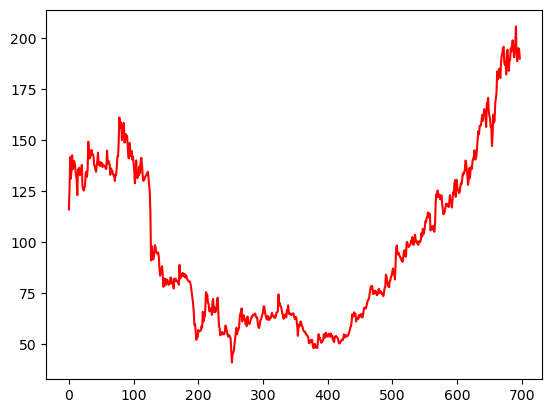

In [100]:
plt.plot(df1.index, df1, 'r-')  # 'r-' means a red solid line


In [101]:
import pandas as pd

df1.index = pd.date_range(start="2021-07-23", periods=len(df1), freq="D")  # 'D' for daily frequency


In [102]:
df1

,High
2021-07-23,116.000000
2021-07-24,126.349998
2021-07-25,141.699997
2021-07-26,131.000000
2021-07-27,134.949997
...,...
2023-06-16,188.800003
2023-06-17,192.899994
2023-06-18,195.149994
2023-06-19,194.399994


In [103]:
#Decomposition

In [104]:
additive_decompose = seasonal_decompose(df1['High'],model='additve',period=30)
trend = additive_decompose.trend
seasonality = additive_decompose.seasonal
resid = additive_decompose.resid

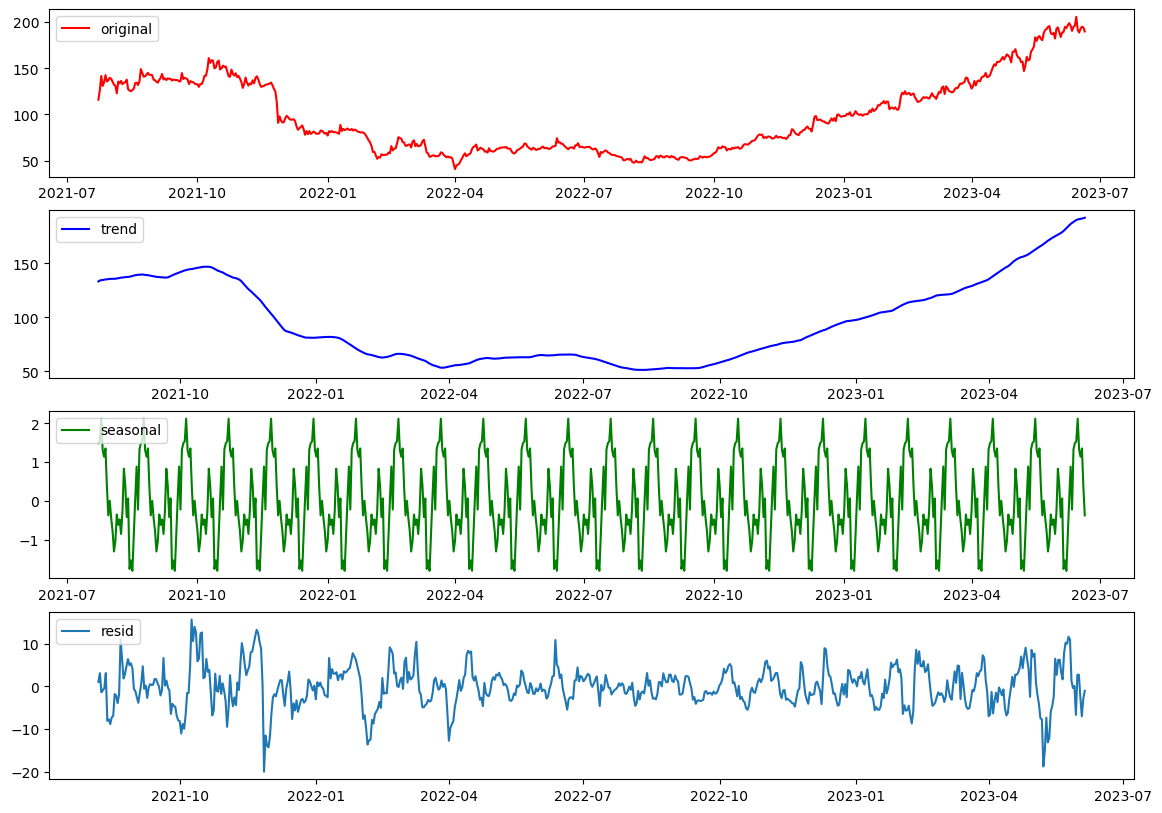

In [105]:
plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df1['High'],label='original',color='r')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label='trend',color='b')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonality,label='seasonal',color='g')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(resid,label='resid')
plt.legend(loc='upper left')

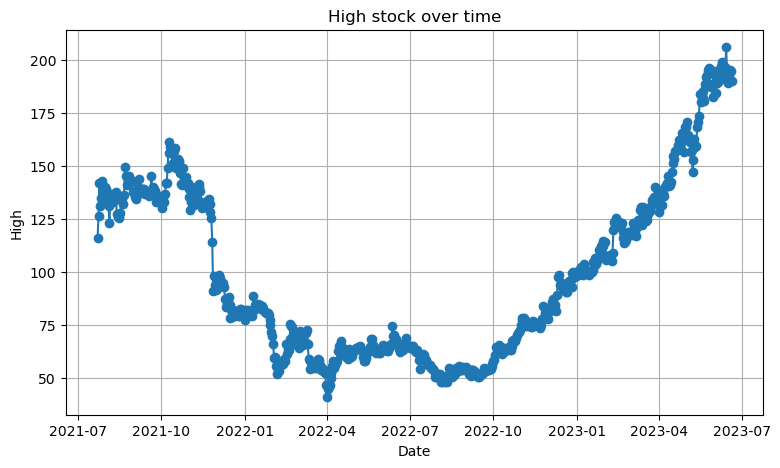

In [106]:
plt.figure(figsize=(9,5))
plt.plot(df1, marker='o', linestyle='-')
plt.title("High stock over time")
plt.xlabel("Date")
plt.ylabel("High")
plt.grid()
plt.show()


In [107]:
result = adfuller(df1['High'])
print("ADF Statistics:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("The data is non-stationary.Differencing is required.")
else:
    print("The data is stationary")

ADF Statistics: 0.02693566632717311
p-value: 0.960703763893124
The data is non-stationary.Differencing is required.


In [108]:
#Differencing
df1_diff = df1.diff().dropna()

In [109]:
df1

,High
2021-07-23,116.000000
2021-07-24,126.349998
2021-07-25,141.699997
2021-07-26,131.000000
2021-07-27,134.949997
...,...
2023-06-16,188.800003
2023-06-17,192.899994
2023-06-18,195.149994
2023-06-19,194.399994


In [110]:
df1 = df1.diff().dropna()
adf_test(df1['High'])

ADF Statistic: -21.30819959520639
p-value: 0.0
The data is stationary.


In [ ]:
#ACF plot & PACF plot

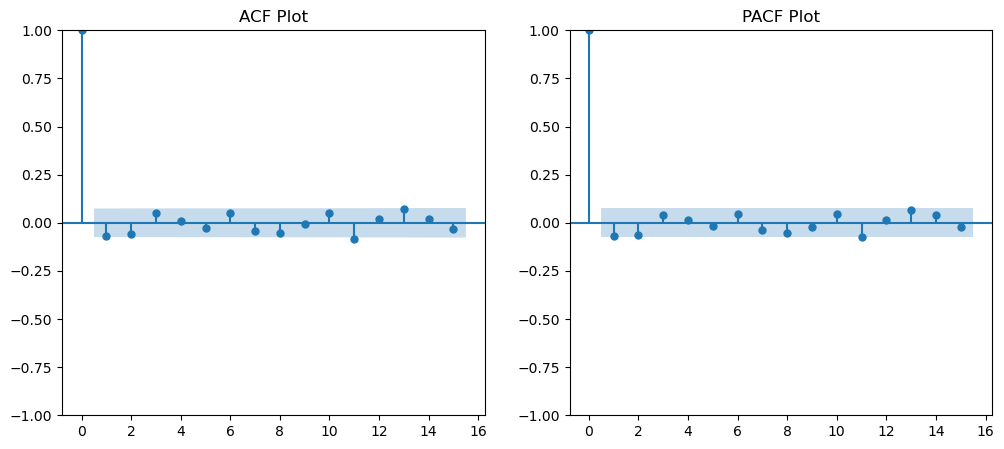

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df1_diff, lags=15, ax=axes[0])
plot_pacf(df1_diff, lags=15, method="ywm", ax=axes[1])
axes[0].set_title("ACF Plot")
axes[1].set_title("PACF Plot")
plt.show()

In [112]:
# Fit ARIMA model (p, d, q) = (5,1, 0) base on ACF/PACF analysis

model = ARIMA(df1, order=(5,1,0))
model_fit = model.fit()

In [113]:
#Print model summary 

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                  697
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1876.660
Date:                Wed, 09 Apr 2025   AIC                           3765.320
Time:                        22:27:10   BIC                           3792.592
Sample:                    07-24-2021   HQIC                          3775.865
                         - 06-20-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9096      0.025    -35.744      0.000      -0.959      -0.860
ar.L2         -0.7993      0.035    -22.671      0.000      -0.868      -0.730
ar.L3         -0.5734      0.038    -15.145      0.0

In [114]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#forecasts 12 future time points 

In [115]:
df1.shape

(697, 1)

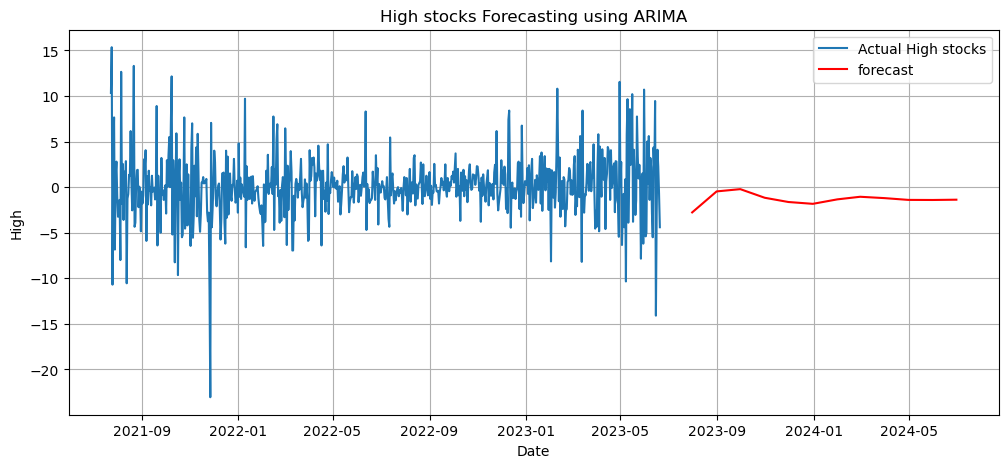

In [126]:
plt.figure(figsize=(12,5))
plt.plot(df1, label="Actual High stocks")
plt.plot(pd.date_range(df1.index[-1],periods=forecast_steps+1, freq="M")[1:], forecast, label="forecast",color="red")
plt.title("High stocks Forecasting using ARIMA")
plt.xlabel("Date")
plt.ylabel("High")
plt.legend()
plt.grid()
plt.show()